### 1 задание

Импортируйте библиотеки pandas и numpy

In [3]:
import pandas as pd
import numpy as np

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn. Создайте датафреймы X и y из этих данных.

In [4]:
from sklearn.datasets import load_boston
boston = load_boston()
data = boston['data']
feature_names = boston['feature_names']
X = pd.DataFrame(data, columns=feature_names)
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
target = boston['target']
Y = pd.DataFrame(target, columns=['price'])
Y.head()

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 30% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Создайте модель линейной регрессии под названием lr с помощью класса LinearRegression из модуля sklearn.linear_model.

In [7]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

Обучите модель на тренировочных данных (используйте все признаки) и сделайте предсказание на тестовых.

In [8]:
lr.fit(X_train, Y_train)
y_pred_lr = lr.predict(X_test)
check_test_lr = pd.DataFrame({
    'Y_test': Y_test['price'],
    'Y_pred_lr': y_pred_lr.flatten()
})

check_test_lr.head()

,Y_test,Y_pred_lr
173,23.6,28.648960
274,32.4,36.495014
491,13.6,15.411193
72,22.8,25.403213
452,16.1,18.855280


Вычислите R2 полученных предказаний с помощью r2_score из модуля sklearn.metrics.

In [9]:
from sklearn.metrics import mean_squared_error

mean_squared_error_lr = mean_squared_error(check_test_lr['Y_pred_lr'], check_test_lr['Y_test'])
print(mean_squared_error_lr)

21.517444231176995


### 2 задание

Создайте модель под названием model с помощью RandomForestRegressor из модуля sklearn.ensemble.
Сделайте агрумент n_estimators равным 1000, max_depth должен быть равен 12 и random_state сделайте равным 42.



Напишите в комментариях к коду, какая модель в данном случае работает лучше.


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
model = RandomForestRegressor(n_estimators=1000, max_depth=12, random_state=42)

Обучите модель на тренировочных данных аналогично тому, как вы обучали модель LinearRegression,
но при этом в метод fit вместо датафрейма y_train поставьте y_train.values[:, 0],
чтобы получить из датафрейма одномерный массив Numpy,так как для класса RandomForestRegressor в данном методе для аргумента y предпочтительно применение массивов вместо датафрейма.

In [12]:
model.fit(X_train, Y_train.values[:, 0])

RandomForestRegressor(max_depth=12, n_estimators=1000, random_state=42)

Сделайте предсказание на тестовых данных и посчитайте R2. Сравните с результатом из предыдущего задания.

In [14]:
y_pred_model = model.predict(X_test)
check_test_model = pd.DataFrame({
    'Y_test': Y_test['price'],
    'Y_pred_model': y_pred_model.flatten()
})
check_test_model.head()

,Y_test,Y_pred_model
173,23.6,22.806412
274,32.4,31.131464
491,13.6,16.339125
72,22.8,23.810726
452,16.1,17.139521


In [31]:
mean_squared_error_model = mean_squared_error(check_test_model['Y_pred_model'], check_test_model['Y_test'])
print(f'Среднее квадратичное отклонение через случайный лес - {round(mean_squared_error_model, 2)}\nСреднее квадратичное отклонение через линейную регрессию - {round(mean_squared_error_lr, 2)}\nРазница в пользу случайного леса в {round((mean_squared_error_lr - mean_squared_error_model), 2)} пунктов')

Среднее квадратичное отклонение через случайный лес - 9.33
Среднее квадратичное отклонение через линейную регрессию - 21.52
Разница в пользу случайного леса в 12.18 пунктов


### 3 задание

Вызовите документацию для класса RandomForestRegressor,
найдите информацию об атрибуте feature_importances_.

In [34]:
print(model.feature_importances_)

[0.03167574 0.00154252 0.00713813 0.00123624 0.01426897 0.40268179
 0.01429864 0.06397257 0.00528122 0.01152493 0.01808108 0.01245085
 0.41584732]


In [39]:
feature_importance = pd.DataFrame({'name':X.columns, 
                                   'feature_importance':model.feature_importances_}, 
                                  columns=['feature_importance', 'name'])
feature_importance

,feature_importance,name
0,0.031676,CRIM
1,0.001543,ZN
2,0.007138,INDUS
3,0.001236,CHAS
4,0.014269,NOX
5,0.402682,RM
6,0.014299,AGE
7,0.063973,DIS
8,0.005281,RAD
9,0.011525,TAX


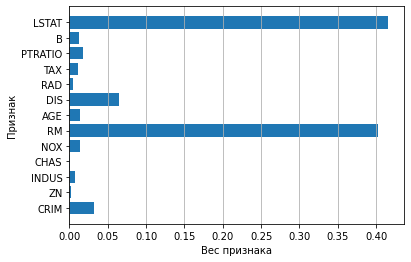

In [83]:
from matplotlib import pyplot as plt
%matplotlib inline
plt.barh(feature_importance['name'], feature_importance['feature_importance'])

plt.xlabel("Вес признака")
plt.ylabel("Признак")
plt.grid(axis='x')
plt.show()

In [40]:
feature_importance.nlargest(2, 'feature_importance')

,feature_importance,name
12,0.415847,LSTAT
5,0.402682,RM
